# Basic regression tutorial
This notebook gives a very basic example of a regression problem in machine learning

In [1]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

Pandas dataframes are the easiest way to handle data for machine learning, and can be easily read from various file formats, such as CSV

In [2]:
df = pd.read_csv('data/chl_regression_tutorial.csv')
print(f'Number of rows: {len(df)}')
df.head()

Number of rows: 10000


,rho_443_a,rho_492_a,rho_560_a,rho_665_a,rho_704_a,rho_740_a,rho_783_a,rho_865_a,CHL
0,0.025450,0.034354,0.038840,0.014968,0.011265,0.007866,0.007571,0.006715,3.205145
1,0.040568,0.050245,0.044812,0.013897,0.009645,0.003701,0.003732,0.001422,1.396899
2,0.026594,0.023411,0.021074,0.011758,0.009776,0.007467,0.006408,0.003856,4.047161
3,0.020331,0.020849,0.019465,0.012453,0.011534,0.011526,0.012495,0.012430,1.273884
4,0.051393,0.047053,0.039605,0.018307,0.015900,0.013166,0.011069,0.007875,1.420762


A dataset should be split up into a training and test set. This is easily done using `train_test_split` from scikit-learn. Note that this train / test split is completely random and does not take into account spatial and temporal correlations.

In [3]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print(f'Number of rows in training set: {len(df_train)}')
print(f'Number of rows in test set: {len(df_test)}')

Number of rows in training set: 8000
Number of rows in test set: 2000


Machine learning problems are often defined in terms of `X -> model -> y`, where X represents your features, and y represents your target. Before training, we extract our X and y from the dataframe.

In [4]:
features = ['rho_443_a', 'rho_492_a', 'rho_560_a', 'rho_665_a', 'rho_704_a', 'rho_740_a', 'rho_783_a', 'rho_865_a']
target = 'CHL'

X_train = df_train[features]
y_train = df_train[target]

X_test = df_test[features]
y_test = df_test[target]

Defining a model is as simple as importing it from a library, usually sklearn.

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

The model can then be applied to other data, such as `X_test`.

Sklearn also has builtin methods for evaluation. These are usually in the form `metric(y_true, y_pred))`, where `y_true` is your ground truth, and `y_pred` are your predictions on the test set.

In [6]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

Mean squared error: 7.254258799191339


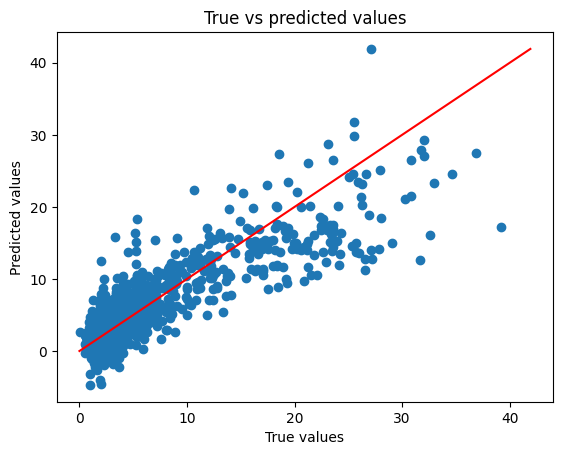

In [7]:
# make a scatterplot
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs predicted values')

# add 1-1 line
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], color='red')

plt.show()